<a href="https://colab.research.google.com/github/blessing3140/PREDICTING-MEDICAL-INSURANCE-CHARGE-USING-MULTI-LINEAR-REGRESSION/blob/main/DATA_SCIENCE_PROJECT_PREDICTING_MEDICAL_INSURANCE_USING_MULTIPLE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PREDICTING MEDICAL INSURANCE: USING MULTIPLE LINEAR REGRESSION**

#**OBJECTIVES**


The goal of this project is to build a *Multiple Linear Regression model* that predicts *medical insurance charges* (charges) based on a set of independent variables such as:  
- *Demographic factors* (age, sex, region)  
- *Health-related factors* (BMI, smoking status)  
- *Family structure* (number of children)  

By analyzing these factors, we aim to:  
1. *Identify key variables* that significantly impact insurance costs.  
2. *Develop a predictive model* to estimate insurance charges for new customers.  
3. *Provide actionable insights* for insurance companies to optimize their pricing strategies.  

#### *Dataset Overview*  
The dataset contains *1338 records* with the following features:  
- age: Age of the individual  
- sex: Gender (male or female)  
- bmi: Body Mass Index (BMI)  
- children: Number of dependents  
- smoker: Whether the individual is a smoker (yes or no)  
- region: Residential region (southwest, southeast, northwest, northeast)  
- charges: *Medical insurance cost* (target variable)  






#**Problem Statement**
Insurance companies use various factors to determine the charges for an individual. The goal of this project is to build a *multi-linear regression model* to predict insurance charges based on variables such as age, BMI, smoking status, and region. This model will help insurance companies set fair premiums and assist individuals in understanding their expected costs.

#**Data Preprocessing and EDA**
Here, the dataset is prepared for model training by cleaning and transforming the data.

This should follow the steps below:
* import the data into the python project/environment
* Identify and address missing data
* Correlation of numerical features
  * with the target
  * with themselves
* Handling outlier values
* Explore non-numerical values
  * low- and high-cardinality categorical variables
  * non-categorical (unique) values


In [ ]:
!pip install category_encoders
!pip install streamlit
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/insurance.csv')

Mounted at /content/insurance.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import Statements

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.utils.validation import check_is_fitted
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, Dropdown, IntSlider


import streamlit as st
import pickle



In [ ]:
# importing our Dataset into our Google Colaboratory


df = pd.read_csv("/content/drive/MyDrive/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
# Getting a brief information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#**Taking out irregularities**

In [ ]:
#The entire Dataset with the total of 1338 rows and 7columns has no null value

In [ ]:
#Checking for null values
# The code returns true if the row is null  or balank or returns false

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


#There's no values missing in this case

In [ ]:
#      SUMMARY STATISTIC

# This provides a quick summary of data and
#are useful for comparing different data sets.It compares one project to another

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##**Correlation of Features**
Correlation of numerical features

<Axes: >

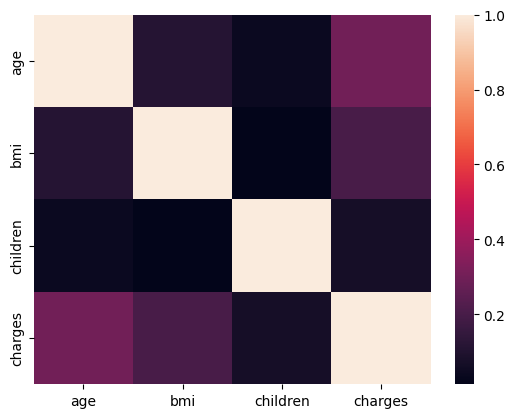

In [ ]:
# correlation for numerical values

df.select_dtypes("number").corr()

sns.heatmap(df.select_dtypes("number").corr())

In [ ]:
# Correlation
df[["age", "bmi", "children", "charges"]].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#**Handle Outlier Values**
Lets check for outlier values using boxplot

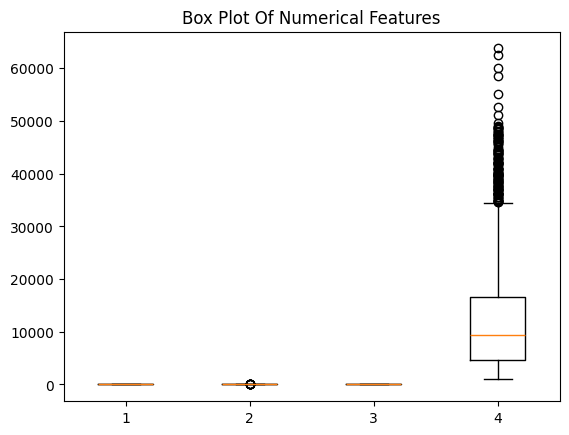

In [ ]:
# plotting boxplot of numerical features
plt.boxplot(df[["age", "bmi", "children", "charges"]])
plt.title("Box Plot Of Numerical Features")

plt.show()




In [ ]:
# handling the outlier values by flooring them

for column in df.select_dtypes("number").columns:

  # first step: get the 25th and 75th percentiles
  Q1 = df[column].quantile(0.25)
  Q2 = df[column].quantile(0.75)

  # second step: calculate inter-quartile range
  IQR = Q2 - Q1

  # get the lower and upper bounds using 25th and 75th percentiles, and inter-quartile range
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q2 + 1.5 * IQR

  # floor the outliers: replace outliers with lower & upper bounds
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])



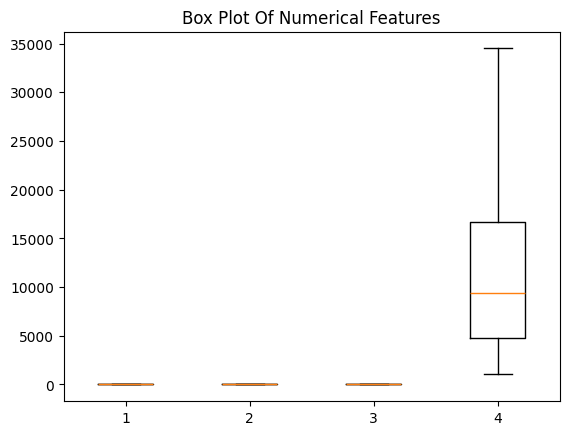

In [ ]:
# plotting boxplot of numerical features
plt.boxplot(df[["age", "bmi", "children", "charges"]])
plt.title("Box Plot Of Numerical Features")

plt.show()



##**Explore non-numerical values**
* low- and high-cardinality categorical variables
* non-categorical (unique) values

In [ ]:
# low- and high-cardinality categorical variables
df.select_dtypes("object").nunique()

,0
sex,2
smoker,2
region,4


With the result above, Region column is the only one that is balanced enough to be used in training the model we're creating.




In [ ]:
# check out what the dataframe looks like now

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [ ]:
# define features and target variable
x= df.drop(columns=['charges'])

y= df['charges']

##**Split Data**
* First, we separate the rows into
  * Feature matrix; X, and
  * target vector; y
  
* Then we split both X and y into
  * train data: X_train and y_train, and
  * test data; X_test and y_test

In [ ]:
# feature matrix and target vector

# defining the columns for feature and target
feature = ["age",	"bmi","region","children"]
target = "charges"

# now lets use the variables above to get the corresponding data from the car_df dataframe
X = df[feature]
y = df[target]

In [ ]:
# now let's split the data into test and train

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the shapes of training and testing sets
print(f"X (feature)=>\ttrain: {X_train.shape} test:{X_test.shape} \ny (target)=>\ttrain:{y_train.shape} test:{y_test.shape}")

X (feature)=>	train: (1070, 4) test:(268, 4) 
y (target)=>	train:(1070,) test:(268,)


#**Build Model**

we are expected to do the following:
* Create baseline
* Create, and train/fit the model
* Evaluate the performance of the model

In [ ]:
# creating the baseline model

# first we calculate the mean
y_mean = y_train.mean()

y_mean

12566.86561618458

In [ ]:
# create the baseline predictions (mean values)

y_pred_baseline = [y_mean] * len(y_train)

y_pred_baseline[:4]

[12566.86561618458, 12566.86561618458, 12566.86561618458, 12566.86561618458]

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 4) (268, 4) (1070,) (268,)


In [ ]:
# measure performance of the dumb model
# we will be using the mean absolute error (MAE)

mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print(f"Mean charges: {round(y_mean, 4)} naira")
print(f"Mean absolute error for Baseline: {round(mae_baseline, 4)} naira")

Mean charges: 12566.8656 naira
Mean absolute error for Baseline: 7959.9427 naira


##**Create and Fit Model**

Here, we create our model and fit it with the training data. To do this, we are going to use a pipeline, within which we will have:

* OneHotEncoder to encode categorical values
* SimpleImputer to fill missing values
* Ridge for Ridge regression and also create a linear regression model


#**BUILD AND EVALUATE MODEL**

In [ ]:
# create pipeline
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)




In [ ]:
# model

model = make_pipeline(OneHotEncoder(), SimpleImputer(), Ridge())

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['region'])),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [ ]:
# confirm fitting

check_is_fitted(model[-1])


In [ ]:
# identify categorical and numerical columns
categorical_columns = X_train.select_dtypes("object").columns
numerical_columns = X_train.select_dtypes("number").columns


In [ ]:
# scaling numerical data, enconding categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", "passthrough", numerical_columns),
        ("categorical", OneHotEncoder(), categorical_columns)
    ]
)

In [ ]:
# define linear regression pipeline


linear_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LinearRegression())
    ]
)

In [ ]:
# training model

linear_pipeline.fit(X_train ,y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  Index(['age', 'bmi', 'children'], dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  Index(['region'], dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
#define ridge regression pipeline with alpha =1.0 (default regularization strength)

ridge_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", Ridge(alpha=1.0))])



#**Make Predictions**

#**Test Model with Training Data**

> Add blockquote



In [ ]:
#Make Predictions using linear regression
y_train_pred_linear = linear_pipeline.predict(X_train)
y_test_pred_linear = linear_pipeline.predict(X_test)

In [ ]:
# define and fit ridge regression pipeline

ridge_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  Index(['age', 'bmi', 'children'], dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  Index(['region'], dtype='object'))])),
                ('model', Ridge())])

In [ ]:
# make predictions using ridge regression
y_train_pred_ridge = ridge_pipeline.predict(X_train)
y_test_pred_ridge = ridge_pipeline.predict(X_test)

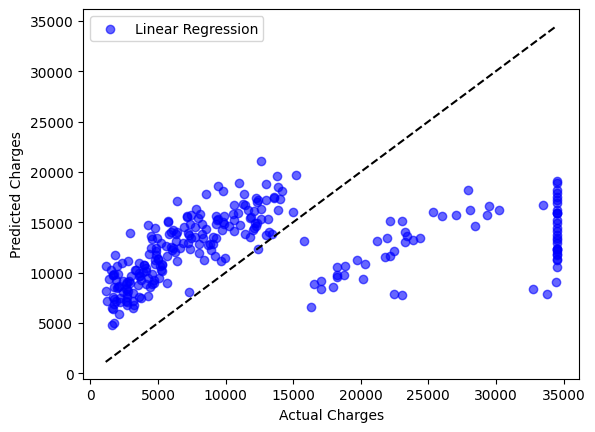

In [ ]:
# scatter plot 1 of actual vs predicted values
plt.scatter(y_test, y_test_pred_linear,
label="Linear Regression", color="blue",alpha=0.6)

# reference line (ideal predictions)
plt.plot([min(y_test), max(y_test)],
[min(y_test), max(y_test)], color="black",linestyle="dashed")

# Label & Legend
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()

plt.show()



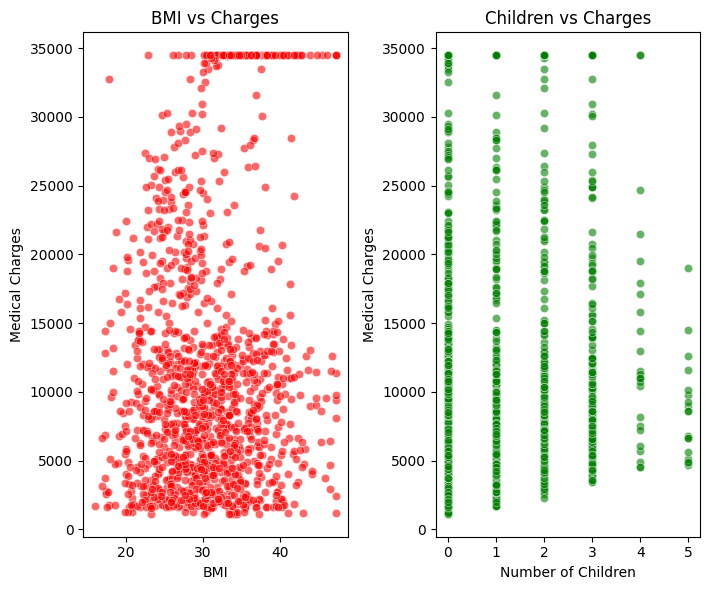

In [ ]:
# Scatter Plot 2: BMI vs Charges
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 2)
sns.scatterplot(x=df['bmi'], y=df['charges'], alpha=0.6, color='red')
plt.xlabel("BMI")
plt.ylabel("Medical Charges")
plt.title("BMI vs Charges")

# Scatter Plot 3: Children vs Charges
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['children'], y=df['charges'], alpha=0.6, color='green')
plt.xlabel("Number of Children")
plt.ylabel("Medical Charges")
plt.title("Children vs Charges")

# Show plots
plt.tight_layout()
plt.show()

**EVALUATING BASELINE PERFORMANCE**


Next is to evaluate the performance of the model because of the following:

-To measure accuracy


-To identify overfitting & underfitting


-To ensure its suitable for real world application.

Mean absolute error evaluation metrics is employed

In [ ]:
# lets compare multi regressions model between linear regression and ridge regression model.

def evaluate_model(model_name, y_true_train, y_pred_train, y_true_test, y_pred_test):
    print(f"\n📌 Model: {model_name}")
    print(f"Training MAE: {mean_absolute_error(y_true_train, y_pred_train):.2f}")
    print(f"Testing MAE: {mean_absolute_error(y_true_test, y_pred_test):.2f}")

    # Compute MSE first
    mse = mean_squared_error(y_true_test, y_pred_test)

    # Manually compute RMSE (since squared=False is causing issues)
    rmse = mse ** 0.5
    print(f"Testing RMSE: {rmse:.2f}")

    print(f"Testing R² Score: {r2_score(y_true_test, y_pred_test):.4f}")

In [ ]:
# evaluate Linear Regression

evaluate_model("Linear Regression", y_train, y_train_pred_linear, y_test, y_test_pred_linear)



📌 Model: Linear Regression
Training MAE: 7832.55
Testing MAE: 7969.86
Testing RMSE: 9561.07
Testing R² Score: 0.1579


In [ ]:
# evaluate ridge regression
evaluate_model("Ridge Regression", y_train, y_train_pred_ridge, y_test, y_test_pred_ridge)


📌 Model: Ridge Regression
Training MAE: 7832.70
Testing MAE: 7970.03
Testing RMSE: 9561.12
Testing R² Score: 0.1579


#**Interpretation of MAE Values For Linear Regression Model**

model mae for train data (7832.55) is far lesser than the baseline mae (8454.81). This indicates that the model is performing well.
model mae for train data(7832.55) is also very close to model mae for test data(7969.86). This is also an indicaation that the model generalises well.


#**Interpretation of MAE Values For Ridge Regression Model**

model mae for train data (7832.70) is far lesser than the baseline mae (8454.81). This indicates that the model is performing well.
model mae for train data(7832.70) is also very close to model mae for test data(7970.03). This is also an indicaation that the model generalises well.


Mean absolute error evaluation metrics was employed



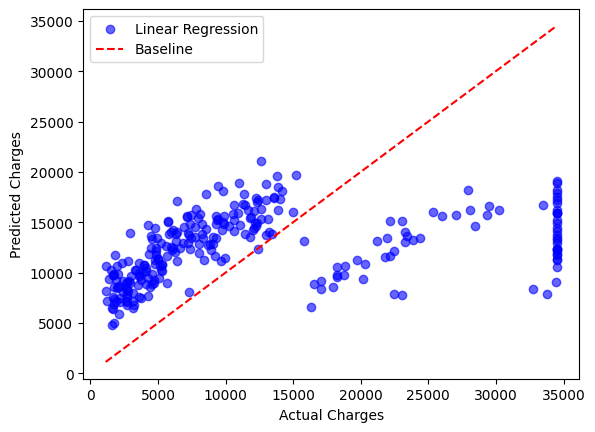

In [ ]:
# scatter plot of actual vs predicted values
plt.scatter(y_test, y_test_pred_linear,
label="Linear Regression", color="blue",alpha=0.6)

# reference line (ideal predictions)
plt.plot([min(y_test), max(y_test)],
[min(y_test), max(y_test)], color="red",linestyle="dashed",label="Baseline")

# Label & Legend
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()

plt.show()


#**Deploy**
We are going to deploy as follows:

* a simple function,
* a slider widget, and then
* a streamlit app.

###**make_prediction Function**

In [ ]:
 #let's create a make_prediction function

def make_prediction(age,bmi,region,children):
    data = {
        "age": age,
        "bmi": bmi,
        "region": region,
        "children": children
    }



    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted charges: {prediction} naira"

In [ ]:
# lets test the function

make_prediction(18,	33.77,	"southeast", 1)



'Predicted charges: 9521.03 naira'

**REPORT MODEL PERFORMANCE**

###**Slider Widget**

In [ ]:
# Create a dropdown to select a column
column_dropdown = widgets.Dropdown(
    options=df.columns,
    value="region",  # Default selected column
    description="Column:",
    style={"description_width": "initial"}
)

# Create a FloatSlider (for numerical columns with decimals)
float_slider = widgets.FloatSlider(
    min=df["bmi"].min(),
    max=df["bmi"].max(),
    step=0.1,
    value=df["bmi"].mean(),
    description="BMI:",
    continuous_update=True
)

# Create an IntSlider (for numerical columns with integers)
int_slider = widgets.IntSlider(
    min=df["age"].min(),
    max=df["age"].max(),
    step=1,
    value=df["age"].median(),
    description="Age:",
    continuous_update=True
)
# Create function to update the display based on selection
def update_display(selected_column, bmi_value, age_value):
    filtered_df = df[(df["bmi"] >= bmi_value) & (df["age"] == age_value)]
    display(filtered_df[[selected_column]])

# Use interactive display
widgets.interactive(update_display,
                    selected_column=column_dropdown,
                    bmi_value=float_slider,
                    age_value=int_slider)

interactive(children=(Dropdown(description='Column:', index=5, options=('age', 'sex', 'bmi', 'children', 'smok…

###**Streamlit Cloud**

This requires a couple of steps:

* Save the model with pickle or any alternative library
* Save the Streamlit code in app.py file
* Create a github repository
  * upload the model file and the app.py files to the repository
  * add a requirements.txt file
* go to https://streamlit.io/cloud, create an account, and create an app
* follow the simple steps on https://streamlit.io/cloud, and your app should get deployed in a minute or less.


**Saving the Model**

To use the trained model in Streamlit, it needs to be saved:

* to google drive
* from google drive to local drive


In [141]:
# Saving the model to model.pkl file on google drive, using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [142]:
# verify the model is saved

!ls

app.py	drive  insurance.csv  model.pkl  requirements.txt  sample_data


**Streamlit Code**

The code below configures streamlit with inputs for entering feature values, and using the model to predict a corresponding target value.

The code is then saved in an app.py file

In [ ]:
# strealit

%%writefile app.py

import pickle
import streamlit as st
import numpy as np
import pandas as pd

# Load your model file
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

st.title('Medical Insurance Charges')

# Add input widgets for user inputs
region = st.selectbox('Region', ['southeast', 'southwest', 'northwest', 'northeast'])

age = st.slider("age (years)", min_value=3, max_value=53, value=26)
charge = st.slider("charge", min_value=1, max_value=5, value=3)

# When the 'Predict' button is clicked
if st.button("Predict"):
    # Prepare the input data as a DataFrame (since pipelines often expect a DataFrame)
    input_data = pd.DataFrame({
        'region': [region],
        'age': [age],
        'charge': [charge]
    })
    prediction = model.predict(input_data)[0].round(2)
    st.write(f'The predicted value is: {prediction} naira')

Writing app.py


**requirements.txt file**
Deploy the Streamlit app, a requirements.txt file has to be included in the github repository.

Run the code below to create the requirements.txt file.

In [144]:
%%writefile requirements.txt

streamlit
scikit-learn
numpy
pickle4
category_encoders

Overwriting requirements.txt


In [143]:
# save model.pkl to local drive
from google.colab import files
files.download("model.pkl")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>